In [40]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [41]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 96F3-7600

 Directory of C:\Users\Beauty\Documents\ExcelR\Assignments\A_16_Neural_networks

11-08-2022  19:03    <DIR>          .
11-08-2022  19:03    <DIR>          ..
11-08-2022  16:10    <DIR>          .ipynb_checkpoints
11-08-2022  19:03            68,364 assignment16_neural_networks.ipynb
14-07-2022  08:46            46,843 forestfires.csv
14-07-2022  08:46         1,155,536 gas_turbines.csv
14-07-2022  08:46             1,130 problem statment(Gas turbines).txt
14-07-2022  08:46                61 Problem_statement(fireforests).txt
               5 File(s)      1,271,934 bytes
               3 Dir(s)  124,258,496,512 bytes free


# Forest Fire

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [42]:
df1=pd.read_csv("forestfires.csv")

In [43]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [45]:
df1.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [46]:
df1.drop(columns=['dayfri','daymon','daysat','daysun','daythu','daytue','daywed'],inplace=True)
df1.drop(columns=['monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'],inplace=True)

In [47]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [48]:
df1['M']=label_encoder.fit_transform(df1['month'])
df1['D']=label_encoder.fit_transform(df1['day'])

In [49]:
df1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,M,D
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small,7,0
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small,10,5
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small,10,2
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small,7,0
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large,1,3
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large,1,3
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large,1,3
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small,1,2


In [50]:
df1.drop(columns='month',inplace=True)
df1.drop(columns='day',inplace=True)

In [51]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,M,D
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small,7,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small,10,5
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small,10,2
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small,7,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large,1,3
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large,1,3
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large,1,3
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small,1,2


In [52]:
df1['size']=label_encoder.fit_transform(df1['size_category'])

In [53]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category,M,D,size
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small,7,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small,10,5,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small,10,2,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small,7,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large,1,3,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large,1,3,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large,1,3,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small,1,2,1


In [54]:
df1.drop(columns='size_category',inplace=True)

In [55]:
df1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,M,D,size
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,7,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,10,5,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,10,2,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,7,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1,3,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1,3,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1,3,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1,2,1


In [56]:
X=df1.iloc[:,:-1]
Y=df1.iloc[:,-1]

In [57]:
X

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,M,D
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,7,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,10,5
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,10,2
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,7,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,7,3
...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,1,3
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,1,3
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,1,3
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1,2


In [58]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size, Length: 517, dtype: int32

In [79]:
# Model

model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(17,input_dim=11,activation='sigmoid'))
model.add(tf.keras.layers.Dense(8,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 17)                204       
                                                                 
 dense_14 (Dense)            (None, 8)                 144       
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [97]:
# Compile model
model.compile(loss ='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [116]:
# Fit the model
model_fit=model.fit(X,Y,batch_size=70,validation_split=0.25,epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 20ms/step - loss: 0.0264 - accuracy: 1.0000 - val_loss: 0.1725 - val_accuracy: 0.9385
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0265 - accuracy: 0.9948 - val_loss: 0.1502 - val_accuracy: 0.9462
Epoch 3/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0257 - accuracy: 1.0000 - val_loss: 0.1538 - val_accuracy: 0.9462
Epoch 4/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 1.0000 - val_loss: 0.1453 - val_accuracy: 0.9462
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.0253 - accuracy: 0.9974 - val_loss: 0.1517 - val_accuracy: 0.9462
Epoch 6/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0243 - accuracy: 1.0000 - val_loss: 0.1661 - val_accuracy: 0.9385
Epoch 7/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0248 - accuracy: 0.9974 - val_loss: 0.1471 - val_accuracy: 0.9462
Epoch 8/100
6/6 [====

6/6 [==============================] - 0s 9ms/step - loss: 0.0163 - accuracy: 0.9974 - val_loss: 0.1692 - val_accuracy: 0.9385
Epoch 60/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.1737 - val_accuracy: 0.9385
Epoch 61/100
6/6 [==============================] - 0s 10ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.1646 - val_accuracy: 0.9385
Epoch 62/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.1556 - val_accuracy: 0.9462
Epoch 63/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.1560 - val_accuracy: 0.9462
Epoch 64/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0181 - accuracy: 0.9922 - val_loss: 0.1618 - val_accuracy: 0.9538
Epoch 65/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0196 - accuracy: 0.9948 - val_loss: 0.1919 - val_accuracy: 0.9385
Epoch 66/100
6/6 [==============

In [117]:
# Evaluating the model
score= model.evaluate(X,Y)
score

17/17 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9845


[0.05105006694793701, 0.9845260977745056]

In [118]:
model.metrics_names

['loss', 'accuracy']

In [119]:
print("Accuracy of the model is:: ",score[1])

Accuracy of the model is::  0.9845260977745056


In [120]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

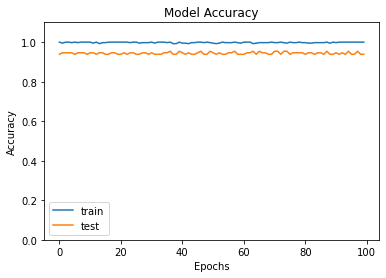

In [123]:
# Plotting for training and testing data
plt.plot(model_fit.history['accuracy'],label='train')
plt.plot(model_fit.history['val_accuracy'],label='test')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0,1.1)
plt.legend(loc='best')

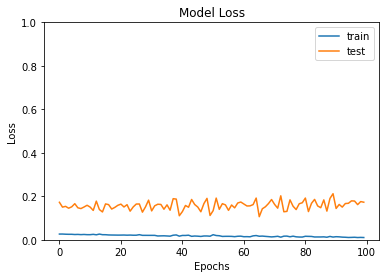

In [122]:
# Plotting for training and testing data
plt.plot(model_fit.history['loss'],label='train')
plt.plot(model_fit.history['val_loss'],label='test')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0,1)
plt.legend(loc='best')

# Gas Turbine

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

1. Variable (Abbr.) Unit Min Max Mean
2. Ambient temperature (AT) C â€“6.23 37.10 17.71
3. Ambient pressure (AP) mbar 985.85 1036.56 1013.07
4. Ambient humidity (AH) (%) 24.08 100.20 77.87
5. Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
6. Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
7. Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
8. Turbine after temperature (TAT) C 511.04 550.61 546.16
9. Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
10. Turbine energy yield (TEY) MWH 100.02 179.50 133.51
11. Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
12. Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [184]:
df2=pd.read_csv("gas_turbines.csv")

In [185]:
df2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


The Target variable is Continuos, hence it will be a Regression problem.

In [186]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [187]:
df2.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [189]:
# Scaling the data
def scale(x):
    x=(x-x.min())/(x.max()-x.min())
    return x

In [190]:
df_temp=df2

In [191]:
df_temp

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [192]:
y=df_temp.iloc[:,7]

In [193]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [194]:
df2.drop(columns='TEY',inplace=True)

In [195]:
df2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [196]:
x=scale(df2.iloc[:,:])

In [197]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578


In [198]:
# Feature--> 10

In [436]:
# model creation

reg_model=tf.keras.models.Sequential()
reg_model.add(tf.keras.layers.Dense(35,input_dim=10,activation='relu'))
reg_model.add(tf.keras.layers.Dense(15,activation='relu'))
reg_model.add(tf.keras.layers.Dense(5,activation='relu'))
reg_model.add(tf.keras.layers.Dense(1,activation='linear'))

In [437]:
reg_model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 35)                385       
                                                                 
 dense_110 (Dense)           (None, 15)                540       
                                                                 
 dense_111 (Dense)           (None, 5)                 80        
                                                                 
 dense_112 (Dense)           (None, 1)                 6         
                                                                 
Total params: 1,011
Trainable params: 1,011
Non-trainable params: 0
_________________________________________________________________


In [438]:
# Compiling the model
reg_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])

In [439]:
# Fit the model
reg_model_fit=reg_model.fit(x,y,validation_split=0.2,epochs=100,batch_size=200)

Epoch 1/100
61/61 [==============================] - 1s 7ms/step - loss: 18291.5410 - mean_squared_error: 18291.5410 - val_loss: 17186.9766 - val_mean_squared_error: 17186.9766
Epoch 2/100
61/61 [==============================] - 0s 3ms/step - loss: 17414.5293 - mean_squared_error: 17414.5293 - val_loss: 15375.2832 - val_mean_squared_error: 15375.2832
Epoch 3/100
61/61 [==============================] - 0s 4ms/step - loss: 13535.3887 - mean_squared_error: 13535.3887 - val_loss: 9100.3701 - val_mean_squared_error: 9100.3701
Epoch 4/100
61/61 [==============================] - 0s 3ms/step - loss: 5246.0293 - mean_squared_error: 5246.0293 - val_loss: 1167.1678 - val_mean_squared_error: 1167.1678
Epoch 5/100
61/61 [==============================] - 0s 3ms/step - loss: 354.6438 - mean_squared_error: 354.6438 - val_loss: 41.8872 - val_mean_squared_error: 41.8872
Epoch 6/100
61/61 [==============================] - 0s 4ms/step - loss: 79.8444 - mean_squared_error: 79.8444 - val_loss: 39.3302 

61/61 [==============================] - 0s 3ms/step - loss: 11.5994 - mean_squared_error: 11.5994 - val_loss: 7.1340 - val_mean_squared_error: 7.1340
Epoch 51/100
61/61 [==============================] - 0s 3ms/step - loss: 11.2003 - mean_squared_error: 11.2003 - val_loss: 6.7263 - val_mean_squared_error: 6.7263
Epoch 52/100
61/61 [==============================] - 0s 3ms/step - loss: 10.8192 - mean_squared_error: 10.8192 - val_loss: 6.4910 - val_mean_squared_error: 6.4910
Epoch 53/100
61/61 [==============================] - 0s 3ms/step - loss: 10.4756 - mean_squared_error: 10.4756 - val_loss: 6.3901 - val_mean_squared_error: 6.3901
Epoch 54/100
61/61 [==============================] - 0s 3ms/step - loss: 10.1543 - mean_squared_error: 10.1543 - val_loss: 6.1665 - val_mean_squared_error: 6.1665
Epoch 55/100
61/61 [==============================] - 0s 4ms/step - loss: 9.8651 - mean_squared_error: 9.8651 - val_loss: 6.0553 - val_mean_squared_error: 6.0553
Epoch 56/100
61/61 [===========

61/61 [==============================] - 0s 4ms/step - loss: 4.7146 - mean_squared_error: 4.7146 - val_loss: 3.6361 - val_mean_squared_error: 3.6361


In [440]:
scores=reg_model.evaluate(x,y)
scores

470/470 [==============================] - 1s 2ms/step - loss: 4.4750 - mean_squared_error: 4.4750


[4.474972724914551, 4.474972724914551]

In [441]:
reg_model.metrics_names

['loss', 'mean_squared_error']

In [442]:
print("MSE ::",scores[1])

MSE :: 4.474972724914551


In [443]:
reg_model_fit.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

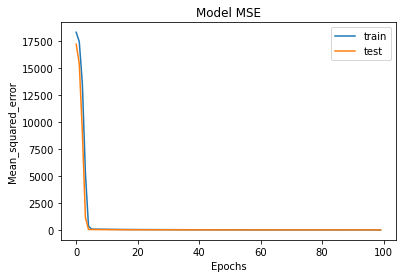

In [445]:
# Plotting for training and testing data
plt.plot(reg_model_fit.history['mean_squared_error'],label='train')
plt.plot(reg_model_fit.history['val_mean_squared_error'],label='test')
plt.title("Model MSE")
plt.xlabel("Epochs")
plt.ylabel("Mean_squared_error")
#plt.ylim(0,1)
plt.legend(loc='best')

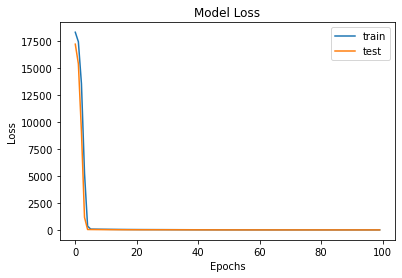

In [446]:
# Plotting for training and testing data
plt.plot(reg_model_fit.history['loss'],label='train')
plt.plot(reg_model_fit.history['val_loss'],label='test')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
#plt.ylim(0,1)
plt.legend(loc='best')

In [447]:
x['predict']=reg_model.predict(x)

470/470 [==============================] - 4s 2ms/step


In [448]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,predict
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548,117.697243
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134,117.831284
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791,117.717400
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984,117.864853
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087,117.736847
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214,110.309059
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100,108.191185
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449,104.951340
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578,109.231148


In [449]:
x['actual']=y

In [450]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,predict,actual
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.135340,0.071522,0.596548,117.697243,114.70
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.133988,0.073372,0.597134,117.831284,114.72
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.134567,0.072576,0.593791,117.717400,114.71
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.135533,0.072375,0.595984,117.864853,114.72
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.136692,0.073647,0.592087,117.736847,114.72
...,...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.095739,0.102448,0.562214,110.309059,111.61
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.102113,0.109894,0.566100,108.191185,111.78
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.111772,0.180552,0.685449,104.951340,110.19
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.121431,0.141693,0.710578,109.231148,110.74
